<a href="https://colab.research.google.com/github/votrannhatquang/AI-s-ng-th-7/blob/main/AI_ST7_31_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
from keras.datasets import mnist
(train_images, train_labels),(test_images,test_lables)=mnist.load_data()

In [116]:
train_images.shape

(60000, 28, 28)

In [117]:
train_labels.shape

(60000,)

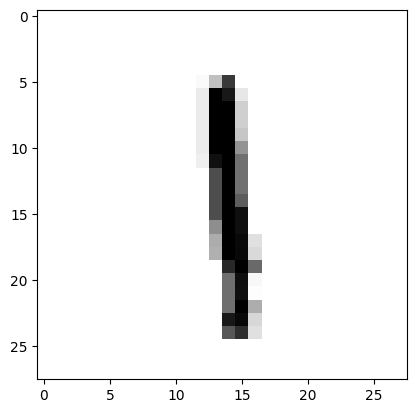

so: 1


In [118]:
import matplotlib.pyplot as plt 
digit= train_images[8]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print('so:',train_labels[8])

<ipython-input-119-76feaa0fa977>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)


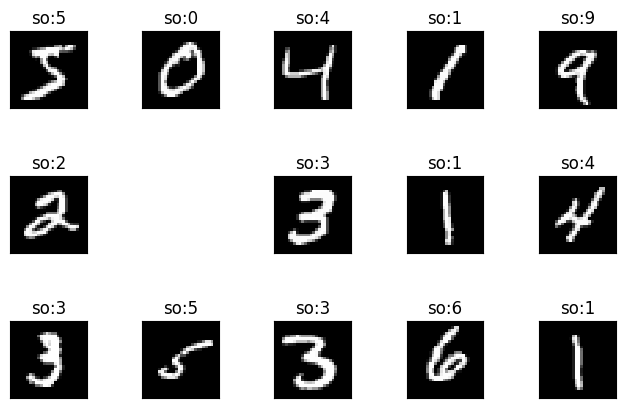

In [119]:
for i in range (15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap='gray',interpolation='none')
  plt.title('so:{}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [120]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(28*28,)))

model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [121]:
X=test_images
Y=test_lables

In [122]:
train_images= train_images.reshape(60000,28*28)
train_images= train_images.astype('float32')/255
test_images=test_images.reshape(10000,28*28)
test_images=test_images.astype('float32')/255

In [123]:
test_images.shape

(10000, 784)

In [124]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels,10)
test_lables=to_categorical(test_lables,10)

In [125]:
test_lables.shape

(10000, 10)

In [126]:
train_labels.shape

(60000, 10)

In [127]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs = 10, batch_size = 128)
test_loss, test_acc=model.evaluate(test_images, test_lables)
print('Mất mát:',test_loss)
print('Độ chính xác:',test_acc)

Epoch 1/10
469/469 [==============================] - 6s 11ms/step - loss: 0.2622 - accuracy: 0.9243
Epoch 2/10
469/469 [==============================] - 4s 10ms/step - loss: 0.1076 - accuracy: 0.9685
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0704 - accuracy: 0.9788
Epoch 4/10
469/469 [==============================] - 4s 10ms/step - loss: 0.0510 - accuracy: 0.9845
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0387 - accuracy: 0.9884
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0286 - accuracy: 0.9914
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0220 - accuracy: 0.9940
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0171 - accuracy: 0.9953
Epoch 9/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0123 - accuracy: 0.9968
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0656 - accuracy

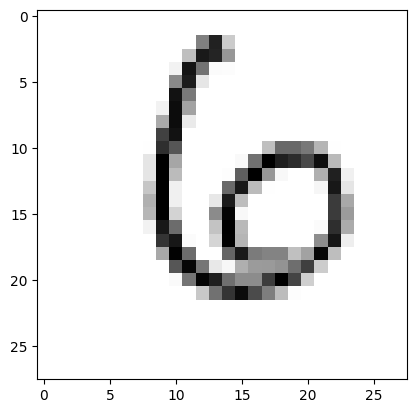

so: 6


In [128]:

digit= X[100]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print('so:',Y[100])

In [130]:
x_pred = X[100].reshape(1,28*28)
x_pred =x_pred.astype('float32')/255

y_pred = model.predict(x_pred)
print(y_pred)

1/1 [==============================] - 0s 88ms/step
[[1.6506662e-07 2.8540392e-10 4.0477943e-08 1.5720279e-10 4.0716182e-09
  2.3149088e-08 9.9999988e-01 9.4533126e-10 5.6354197e-09 2.1018570e-10]]


In [131]:
import numpy as np

np.argmax(model.predict(x_pred),axis=1)

1/1 [==============================] - 0s 23ms/step


array([6])